In [2]:
#Importando librerías

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# <h1><center>Taller gravimetría</center></h1>

## 1.  Gravedad normal

In [3]:
#Cálculo de la gravedad normal con la fórmula de 1967

latitud = 6.82      #Latitud en [°]
longitud = -77.32   #Longitud en [°]
altura = 1200       #Altura de la estación en [m]

#Gravedad normal

def γ0(φ): return 9.78031846*(1+0.0053024*pow(np.sin(φ),2) - 0.0000058*pow(np.sin(2*φ),2))

#Corrección por aire libre

def al(h): return 0.3086*h

print('\nGravedad normal: %.2f [m/s^2]'%(γ0(latitud)))
print('Corrección por aire libre: %.2f [mGal]\n'%al(altura))


Gravedad normal: 9.79 [m/s^2]
Corrección por aire libre: 370.32 [mGal]



## 2. Corrección de gravedad

In [4]:
#Datos de la tabla dada

distancias = np.array([0,1,2,3,4,5,6,7,8])
altura = np.array([80,90,110,100,110,220,350,340,190])
go = np.array([981233.35,981230.53,981225.28,981225.63,981220.48,981192.03,981158.16,981155.39,981183.72])
lat = np.array([52.5,52.4908,52.4817,52.4725,52.4633,52.4542,52.4378,52.4358,52.4267])
lon = np.array([13.33,13.3242,13.315,13.3058,13.2967,13.2875,13.2783,13.2692,13.26])


### 2.1.  Corrección por gravedad normal, aire libre y de Bouguer

In [5]:
ρ = 2.7     #Densidad en [g/cm^3]

#Corrección de Bouguer

def Bouguer(h): return 0.0419*ρ*h

#Tabla de datos

datos = {'Distancia [km]': distancias,
         'Altura [m]': altura,
         'Gravedad observada [mGal]': go,
         'Latitud [°]': lat,
         'Longitud [°]': lon,
         'Gravedad normal [mGal]': γ0(lat)*1e5,
         'Corrección AL [mGal]': al(altura),
         'Corrección B [mGal]': Bouguer(altura)}

df=pd.DataFrame(datos, columns=['Distancia [km]','Altura [m]',
                                'Gravedad observada [mGal]','Latitud [°]',
                                'Longitud [°]', 'Gravedad normal [mGal]', 
                                'Corrección AL [mGal]','Corrección B [mGal]'])

df

,Distancia [km],Altura [m],Gravedad observada [mGal],Latitud [°],Longitud [°],Gravedad normal [mGal],Corrección AL [mGal],Corrección B [mGal]
0,0,80,981233.35,52.5000,13.3300,981244.257504,24.688,9.0504
1,1,90,981230.53,52.4908,13.3242,981290.504287,27.774,10.1817
2,2,110,981225.28,52.4817,13.3150,981336.028241,33.946,12.4443
3,3,100,981225.63,52.4725,13.3058,981381.814397,30.860,11.3130
4,4,110,981220.48,52.4633,13.2967,981427.345690,33.946,12.4443
5,5,220,981192.03,52.4542,13.2875,981472.116184,67.892,24.8886
6,6,350,981158.16,52.4378,13.2783,981552.086006,108.010,39.5955
7,7,340,981155.39,52.4358,13.2692,981561.772157,104.924,38.4642
8,8,190,981183.72,52.4267,13.2600,981605.653227,58.634,21.4947


### 2.2. Anomalía de aire libre y de Bouguer 

In [6]:
#Anomalía de aire libre

Δg_al = go + al(altura)- γ0(lat)*1e5

#Anomalía de Bouguer

Δg_B = Δg_al - Bouguer(altura)

#Tabla de datos

datos = {'Distancia [km]': distancias,
         'Altura [m]': altura,
         'Gravedad observada [mGal]': go,
         'Latitud [°]': lat,
         'Longitud [°]': lon,
         'Gravedad normal [mGal]': γ0(lat)*1e5,
         'Corrección AL [mGal]': al(altura),
         'Corrección B [mGal]': Bouguer(altura),
         'Δg_al [mGal]': Δg_al,
         'Δg_B [mGal]': Δg_B}

df=pd.DataFrame(datos, columns=['Distancia [km]','Altura [m]',
                                'Gravedad observada [mGal]','Latitud [°]',
                                'Longitud [°]', 'Gravedad normal [mGal]', 
                                'Corrección AL [mGal]','Corrección B [mGal]',
                                'Δg_al [mGal]', 'Δg_B [mGal]'])

df

,Distancia [km],Altura [m],Gravedad observada [mGal],Latitud [°],Longitud [°],Gravedad normal [mGal],Corrección AL [mGal],Corrección B [mGal],Δg_al [mGal],Δg_B [mGal]
0,0,80,981233.35,52.5000,13.3300,981244.257504,24.688,9.0504,13.780496,4.730096
1,1,90,981230.53,52.4908,13.3242,981290.504287,27.774,10.1817,-32.200287,-42.381987
2,2,110,981225.28,52.4817,13.3150,981336.028241,33.946,12.4443,-76.802241,-89.246541
3,3,100,981225.63,52.4725,13.3058,981381.814397,30.860,11.3130,-125.324397,-136.637397
4,4,110,981220.48,52.4633,13.2967,981427.345690,33.946,12.4443,-172.919690,-185.363990
5,5,220,981192.03,52.4542,13.2875,981472.116184,67.892,24.8886,-212.194184,-237.082784
6,6,350,981158.16,52.4378,13.2783,981552.086006,108.010,39.5955,-285.916006,-325.511506
7,7,340,981155.39,52.4358,13.2692,981561.772157,104.924,38.4642,-301.458157,-339.922357
8,8,190,981183.72,52.4267,13.2600,981605.653227,58.634,21.4947,-363.299227,-384.793927


### 2.3. Diagrama de corrección de aire libre y de Bouguer

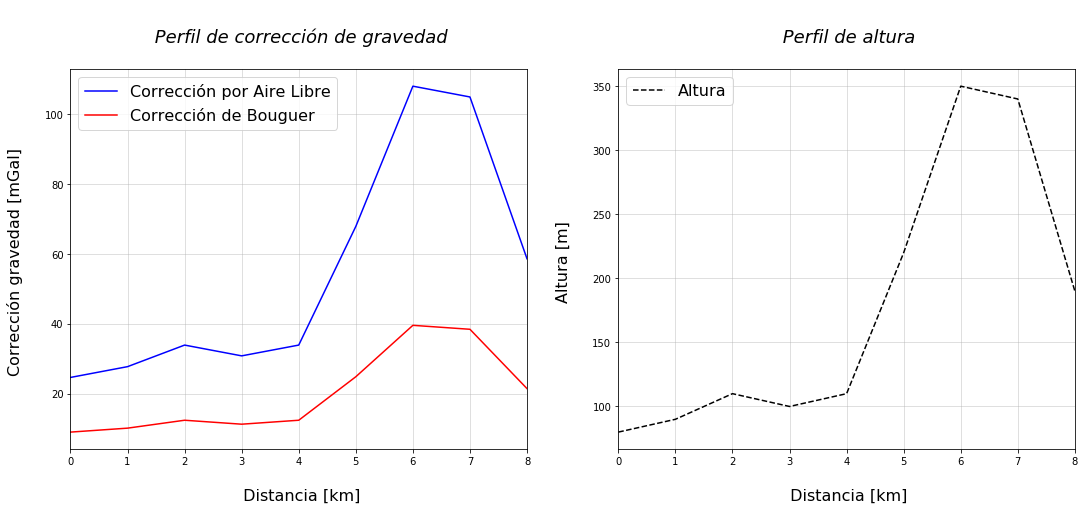

In [13]:
#Gráfica 

plt.figure(figsize = (18,7))

plt.subplot(121)

plt.title('\n Perfil de corrección de gravedad\n', fontstyle = 'italic', fontsize = 18)

plt.plot(distancias, al(altura), 'b-', label = 'Corrección por Aire Libre')
plt.plot(distancias, Bouguer(altura), 'r-', label = 'Corrección de Bouguer')


plt.xlabel('\n Distancia [km]', fontsize = 16)
plt.ylabel('Corrección gravedad [mGal] \n', fontsize = 16)

plt.xlim(min(distancias), max(distancias))

plt.grid(alpha = 0.5)

plt.legend(fontsize = 16)

#--------------------------------------------------------------------------------------

plt.subplot(122)

plt.title('\n Perfil de altura\n', fontstyle = 'italic', fontsize = 18)

plt.plot(distancias, altura, 'k--', label = 'Altura')

plt.xlabel('\n Distancia [km]', fontsize = 16)
plt.ylabel('Altura [m] \n', fontsize = 16)

plt.xlim(min(distancias), max(distancias))

plt.grid(alpha = 0.5)

plt.legend(fontsize = 16)

plt.savefig('Perfiles.png')

plt.show()